In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
IBMQ.load_account()
%matplotlib inline

C:\Users\josev\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [2]:
provider = IBMQ.get_provider('ibm-q')
santiago = provider.get_backend('ibmq_santiago')
belem = provider.get_backend('ibmq_belem')

In [3]:
backend = Aer.get_backend('qasm_simulator')
shots = 8192

In [4]:
qubits = QuantumRegister(3,name='database')
oracle = QuantumRegister(1,name='oracle')
bits = ClassicalRegister(3,name='bits')

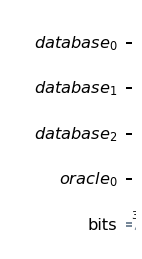

In [65]:
qc = QuantumCircuit(qubits,oracle,bits)
qc.draw('mpl')

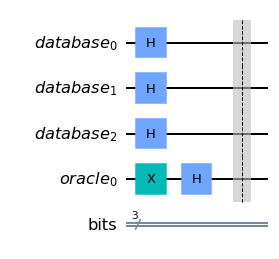

In [66]:
qc.h(qubits)
qc.x(oracle)
qc.h(oracle)
qc.barrier()
qc.draw('mpl')

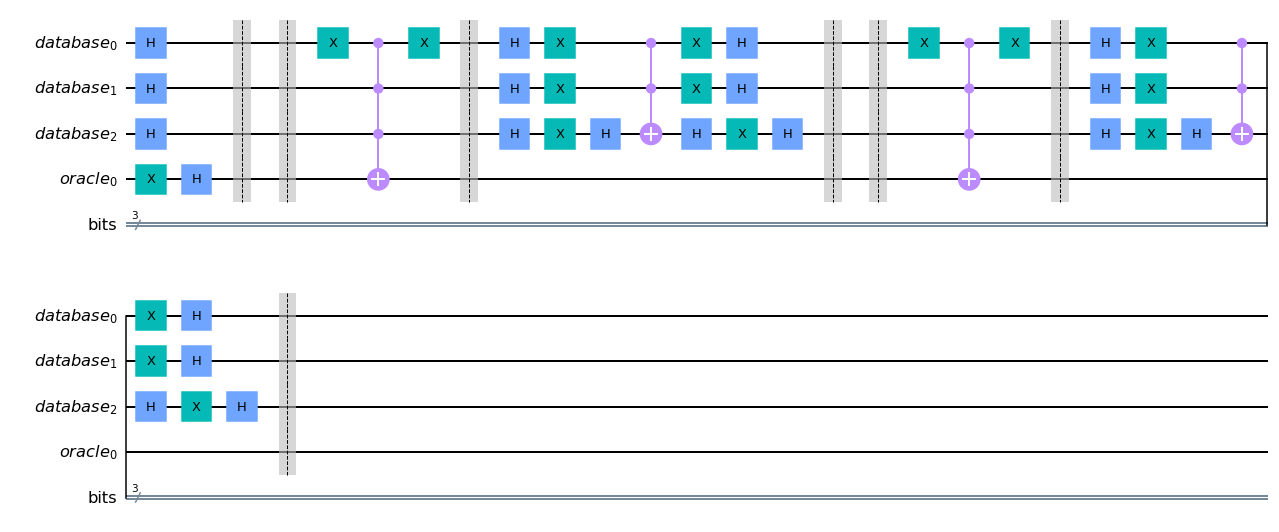

In [67]:
for x in range(2):
    #qc.x(qubits)
    #qc.mct(qubits,oracle)
    #qc.x(qubits)
    qc.barrier()
    qc.x(qubits[0])
    qc.mct(qubits,oracle)
    qc.x(qubits[0])
    qc.barrier()
    qc.draw('mpl')
    qc.h(qubits)
    qc.x(qubits)
    qc.h(qubits[2])
    qc.mct(qubits[0:2],qubits[2])
    qc.h(qubits[2])
    qc.x(qubits)
    qc.h(qubits)
    qc.barrier()
    
qc.draw('mpl')

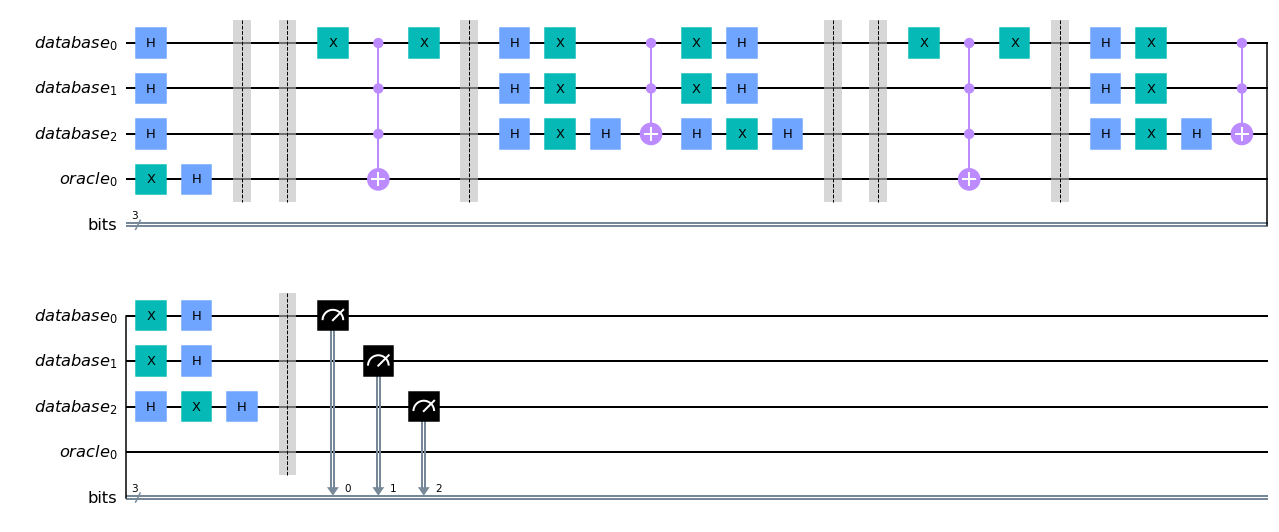

In [68]:
qc.measure(qubits,bits)
qc.draw('mpl')

In [69]:
qc = qc.reverse_bits()

In [70]:
job = execute(qc,backend=backend,shots=shots)

In [71]:
result = job.result()

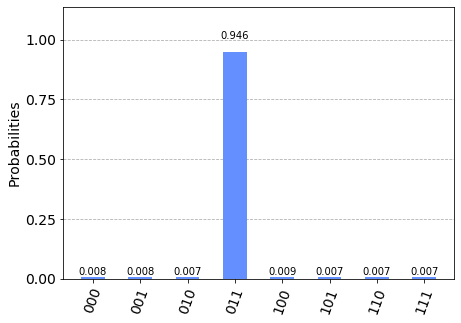

In [72]:
counts = result.get_counts()
plot_histogram(counts)

In [73]:
job2 = execute(qc,initial_layout=[4,3,2,1],backend=santiago,shots=shots)
job3 = execute(qc,initial_layout=[0,2,3,1],backend=belem,shots=shots)

In [ ]:
results_job2 = santiago.retrieve_job('6081f6e3e3b6ad541e62a041').result()
results_job3 = belem.retrieve_job('6081f6e6c7b0461164df0f98').result()

In [74]:
qubits = QuantumRegister(4,name='database')
ancilla = QuantumRegister(4,name='ancilla')
oracle = QuantumRegister(1,name='oracle')
bits = ClassicalRegister(4,name='bits')

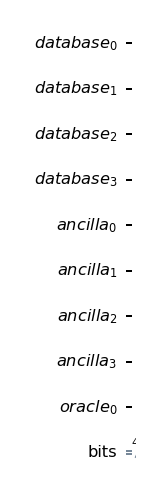

In [75]:
qc = QuantumCircuit(qubits,ancilla,oracle,bits)
qc.draw('mpl')

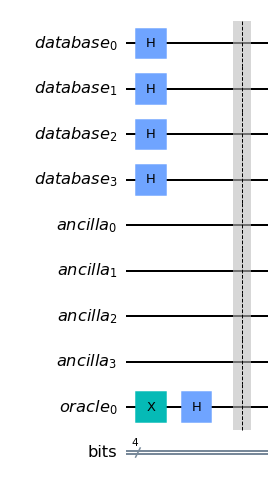

In [76]:
qc.x(oracle)
qc.h(oracle)
qc.h(qubits)
qc.barrier()
qc.draw('mpl')

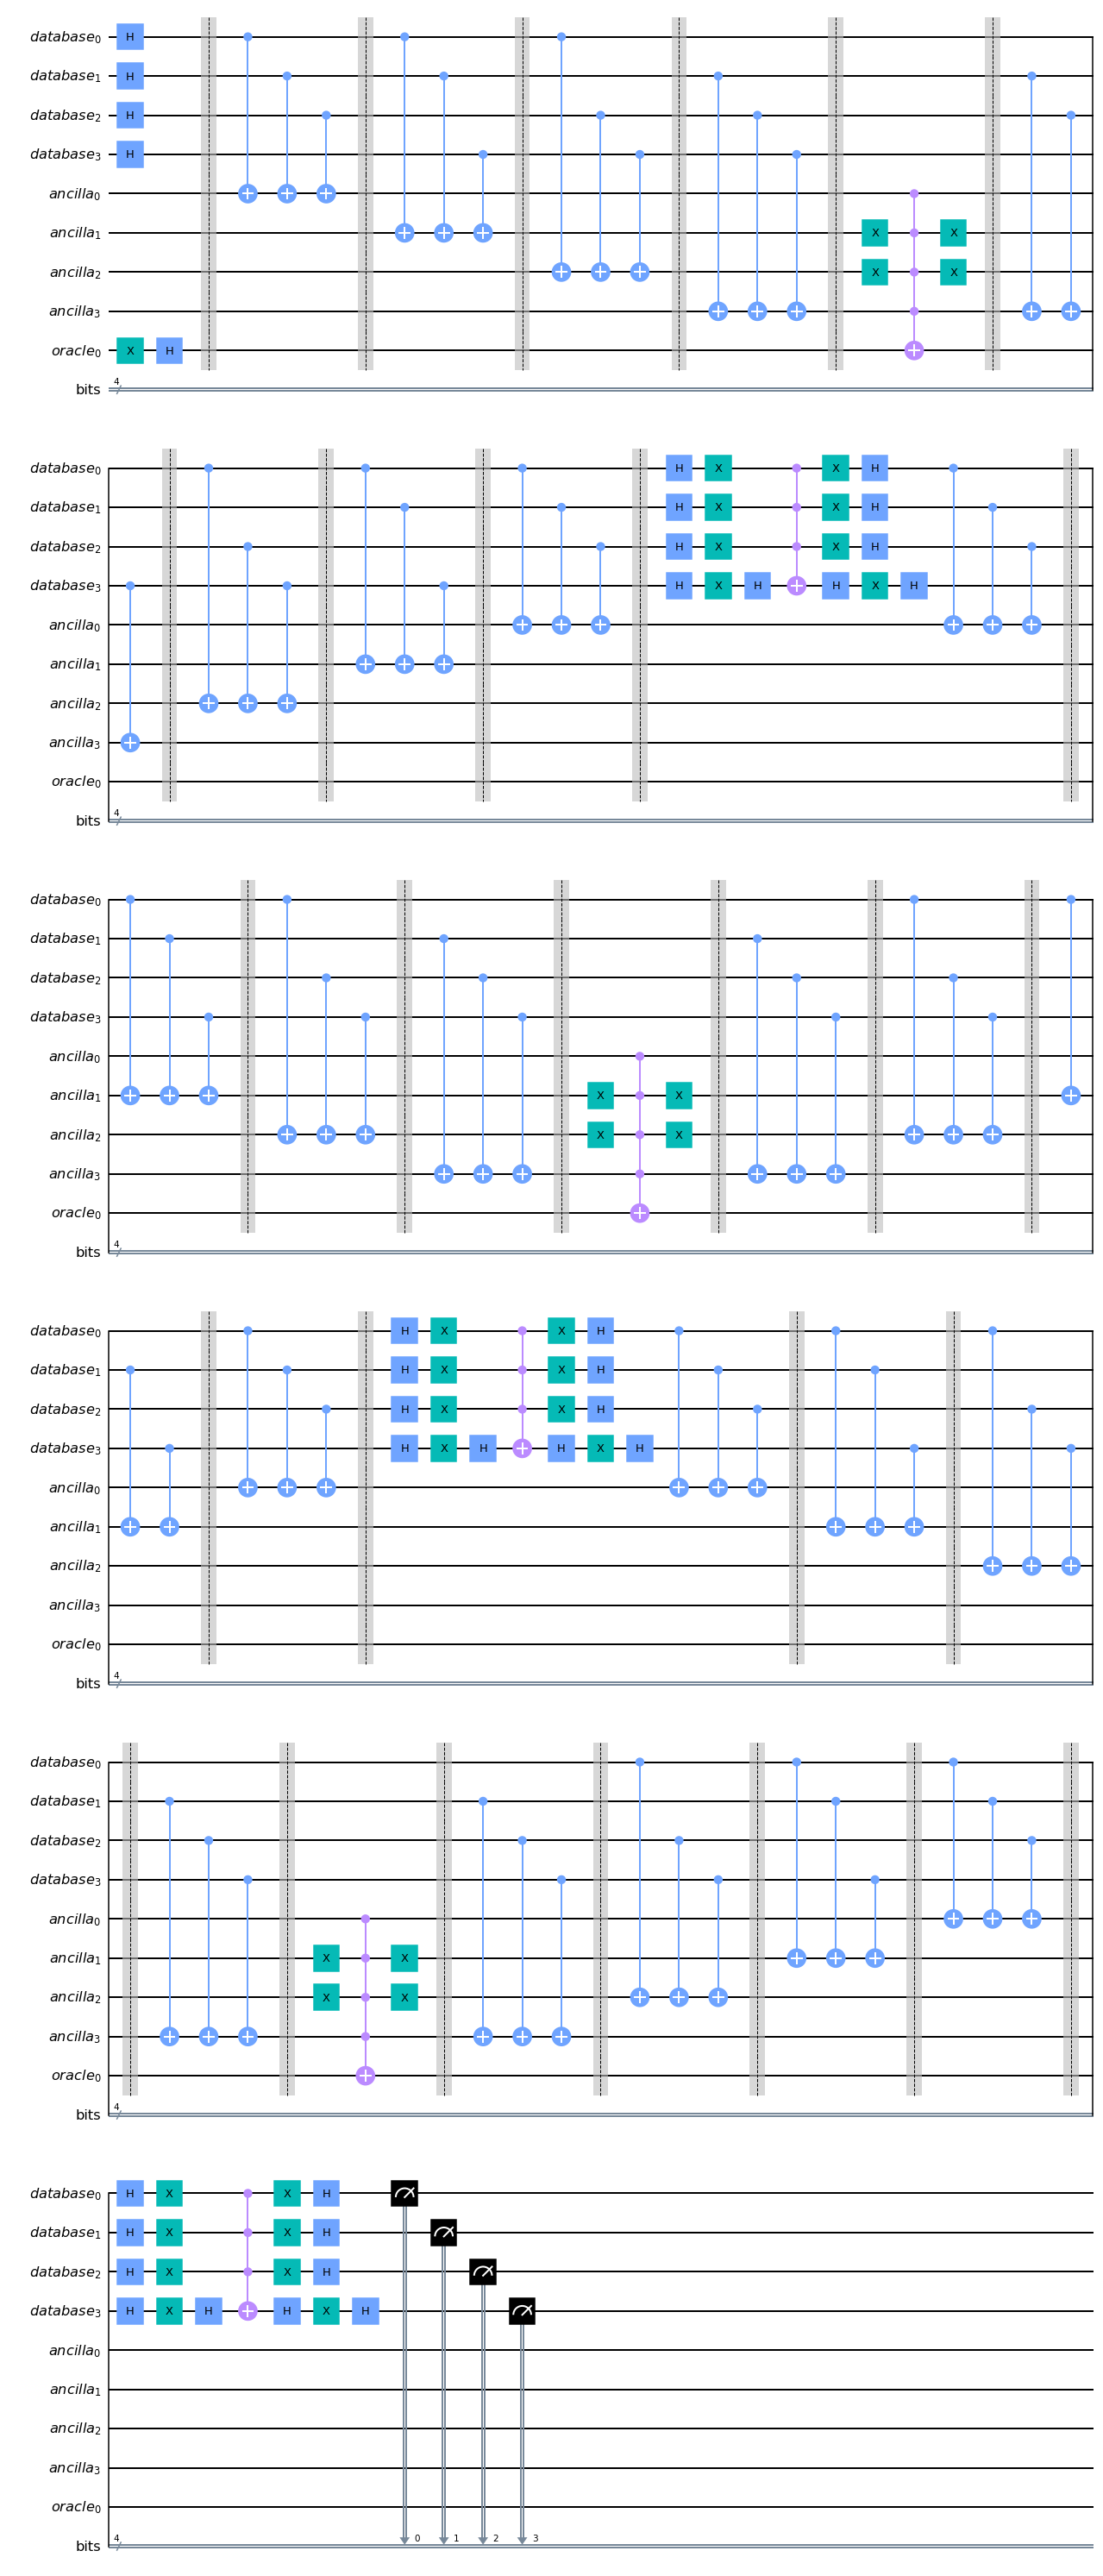

In [77]:
for x in range(3):
    qc.cx(qubits[0],ancilla[0])
    qc.cx(qubits[1],ancilla[0])
    qc.cx(qubits[2],ancilla[0])
    qc.barrier()
    qc.cx(qubits[0],ancilla[1])
    qc.cx(qubits[1],ancilla[1])
    qc.cx(qubits[3],ancilla[1])
    qc.barrier()
    qc.cx(qubits[0],ancilla[2])
    qc.cx(qubits[2],ancilla[2])
    qc.cx(qubits[3],ancilla[2])
    qc.barrier()
    qc.cx(qubits[1],ancilla[3])
    qc.cx(qubits[2],ancilla[3])
    qc.cx(qubits[3],ancilla[3])
    qc.barrier()
    qc.x(ancilla[1])
    qc.x(ancilla[2])
    qc.mct(ancilla,oracle)
    qc.x(ancilla[2])
    qc.x(ancilla[1])
    qc.barrier()
    qc.cx(qubits[1],ancilla[3])
    qc.cx(qubits[2],ancilla[3])
    qc.cx(qubits[3],ancilla[3])
    qc.barrier()
    qc.cx(qubits[0],ancilla[2])
    qc.cx(qubits[2],ancilla[2])
    qc.cx(qubits[3],ancilla[2])
    qc.barrier()
    qc.cx(qubits[0],ancilla[1])
    qc.cx(qubits[1],ancilla[1])
    qc.cx(qubits[3],ancilla[1])
    qc.barrier()
    qc.cx(qubits[0],ancilla[0])
    qc.cx(qubits[1],ancilla[0])
    qc.cx(qubits[2],ancilla[0])
    qc.barrier()
    qc.h(qubits)
    qc.x(qubits)
    qc.h(qubits[3])
    qc.mct(qubits[0:3],qubits[3])
    qc.h(qubits[3])
    qc.x(qubits)
    qc.h(qubits)
qc.measure(qubits,bits)
qc.draw('mpl')

In [78]:
qc = qc.reverse_bits()

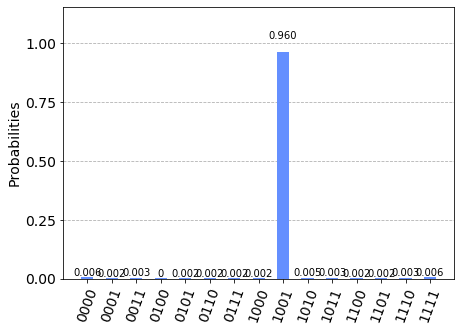

In [79]:
job = execute(qc,backend=backend,shots=1024).result().get_counts()
plot_histogram(job)